## In distribution VS out of distribution performance

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


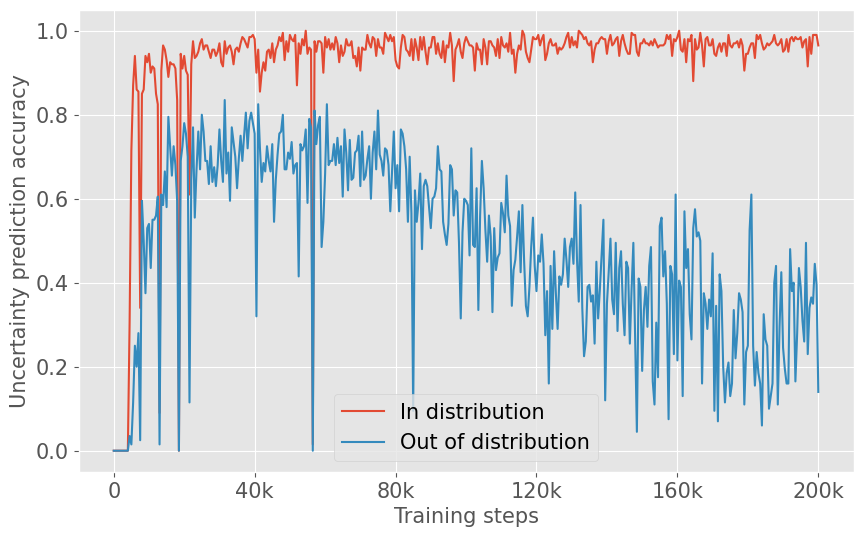

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

root_path = "exp_5_records/"

ID_vec = np.zeros(401)
OOD_vec = np.zeros(401)

for group in ["pos", "neg"]:
    if group == "pos":
        base_sigs = ["0103", "0507"]
    else:
        base_sigs = ["0305", "0709"]

    for base_sig in base_sigs:
        for another_sig in base_sigs:
            sub_record_path = root_path + "sig_" + another_sig + "_" + group + "_sig_" + base_sig+".csv"
            df = pd.read_csv(sub_record_path)
            ID_vec += df.iloc[:, 1]

for group in ["pos", "neg"]:
    if group == "neg":
        OD_sigs = ["0103", "0507"]
    else:
        OD_sigs = ["0305", "0709"]

    for base_sig in OD_sigs:
        for another_sig in OD_sigs:
            sub_record_path = root_path + "sig_" + another_sig + "_" + group + "_sig_" + base_sig+".csv"
            df = pd.read_csv(sub_record_path)
            OOD_vec += df.iloc[:, 1]



ID_vec /= 4
OOD_vec /= 4
most_sig_OOD_example = pd.read_csv(root_path + "sig_0103_neg_sig_0103.csv").iloc[:, 1]
corresponding_ID_example = pd.read_csv(root_path + "sig_0103_pos_sig_0103.csv").iloc[:, 1]

x = np.arange(0, 401) * 500


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(x, corresponding_ID_example,\
         '-', label='In distribution', linewidth = 1.5)
ax.plot(x, most_sig_OOD_example,\
         '-', label='Out of distribution', linewidth = 1.5)



# Labels and title
ax.set_xlabel('Training steps', fontsize="15")
ax.set_ylabel('Uncertainty prediction accuracy', fontsize="15")
# ax.set_ylim(0, 1) 
# ax.set_title('Uncertainty prediction accuracy', fontsize="15", fontweight='bold')

# Grid and legend
# ax.grid(True)
ax.legend(fontsize="15")

x_ticks = [0, 40000, 80000, 120000, 160000, 200000]
# Optionally, label the x-ticks
x_labels = ['0', '40k', '80k', '120k', '160k', '200k']
ax.set_xticks(ticks=x_ticks, labels=x_labels)


ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.savefig('figures/exp_5_Std_pred_accuracy.eps', format='eps')
plt.savefig('figures/exp_5_Std_pred_accuracy.png', format='png')

# Show plot
plt.show()

## Verify that a decreasing OOD ability is due to stronger belief in prior

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


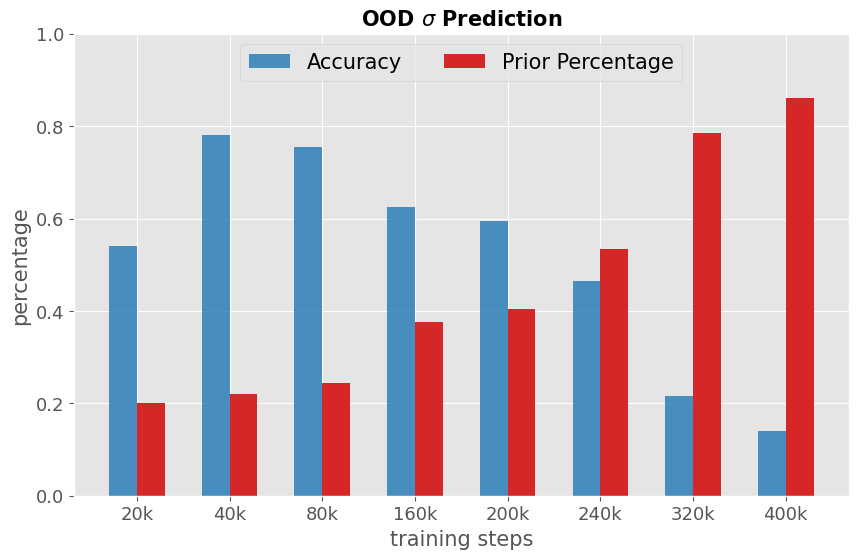

In [70]:
most_sig_OOD_example = np.array(pd.read_csv(root_path + "sig_0103_neg_sig_0103.csv").iloc[:, 1])
predict_into_ID_percent = np.array(pd.read_csv(root_path + "sig_0305_neg_sig_0103.csv").iloc[:, 1])

poses = np.array([20, 40, 80, 160, 200, 241, 320, 400])
OOD_bar = most_sig_OOD_example[poses]
into_ID_bar = predict_into_ID_percent[poses]
into_ID_bar[0] = 0.20


# Labels for the x-axis
labels = ['20k', '40k', '80k', '160k', '200k', '240k', '320k', '400k']

# X locations for the groups
x = np.arange(len(labels))

# Width of the bars
width = 0.3

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plotting the bars
bars1 = ax.bar(x - width/2, OOD_bar, width, label='Accuracy', color='#1f77b4', alpha=0.8)
bars2 = ax.bar(x + width/2, into_ID_bar, width, label='Prior Percentage', color='#d62728', alpha=1)

# Adding labels, title, and legend
ax.set_xlabel('training steps', fontsize="15")
ax.set_ylabel('percentage', fontsize="15")
ax.set_ylim(0,1)
ax.set_title('OOD $\sigma$ Prediction', fontsize="15", fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)
ax.legend(fontsize="15", loc="upper center", ncol=2)

plt.savefig('figures/exp_5_OOD_vs_Prior.eps', format='eps')
plt.savefig('figures/exp_5_OOD_vs_Prior.png', format='png')

# Display the bar chart
plt.show()
